In [1]:
# load the necessary functions
for (fnm in list.files("/home/jovyan/shared_materials/rwwa", full.names = T)) source(fnm)

Loading required package: Lmoments

Loading required package: distillery


Attaching package: ‘extRemes’


The following objects are masked from ‘package:stats’:

    qqnorm, qqplot



Attaching package: ‘plyr’


The following object is masked from ‘package:distillery’:

    is.formula




# Synthesise results from observations and climate models

In [2]:
# load the observational results
df_obs <- read.csv("res-obs.csv", row.names = "X")

In [3]:
# load the climate model results
df_models <- read.csv("res-models_cordex.csv", row.names = "X")

In [4]:
# list the models to INCLUDE in the analysis (use the results spreadsheet to populate the list)
include <- c("CCCma-CanESM2_CLMcom-CCLM4-8-17",
             "CNRM-CERFACS-CNRM-CM5_CNRM-ALADIN63",
             "MOHC-HadGEM2-ES_KNMI-RACMO22E",
             "MOHC-HadGEM2-ES_MOHC-HadREM3-GA7-05",
             "MPI-M-MPI-ESM-LR_DMI-HIRHAM5")

# filter to retain only the models that passed model evaluation
df_models <- df_models[rownames(df_models) %in% include,]

In [5]:
# if looking at temperature data / 'shift' fit, use "abs"; if looking at precipitation / 'fixeddisp', use "rel"
synthesis_type <- "abs"

In [6]:
# change in intensity from past-present
synth_dI_attr <- synthesis(obs_in = df_obs[,grepl(paste0("dI.", synthesis_type), colnames(df_obs))], 
                           models_in = df_models[,grepl("attr_dI", colnames(df_models))], 
                           synth_type = synthesis_type)

# change in likelihood from past-present (if there are any infinite values in the PRs, replace them with estimated values)
synth_PR_attr <- synthesis(obs_in = infer_infinite(df_obs[,grepl("PR", colnames(df_obs))]), 
                           models_in = infer_infinite(df_models[,grepl("attr_PR", colnames(df_models))]), 
                           synth_type = "PR")

# if you see error/warning messages below, you probably have infinite best estimates in your observations - ask us how to handle these

Warning message in max(u_n[is.finite(u_n)]):
“no non-missing arguments to max; returning -Inf”
Warning message in log(est_n):
“NaNs produced”
Warning message in log(est_n):
“NaNs produced”
Warning message in FUN(X[[i]], ...):
“NaNs produced”


In [7]:
# change in intensity from present-future
synth_dI_proj <- synthesis(obs_in = NA, 
                           models_in = df_models[,grepl("proj_dI", colnames(df_models))], 
                           synth_type = synthesis_type)

# change in likelihood from present-future
synth_PR_proj <- synthesis(obs_in = NA, 
                           models_in = df_models[,grepl("proj_PR", colnames(df_models))], 
                           synth_type = "PR")

In [8]:
# save all the synthesised results
write.csv(synth_dI_attr$df, "synth_dI_attr.csv")
write.csv(synth_PR_attr$df, "synth_PR_attr.csv")
write.csv(synth_dI_proj$df, "synth_dI_proj.csv")
write.csv(synth_PR_proj$df, "synth_PR_proj.csv")

## Synthesis figures

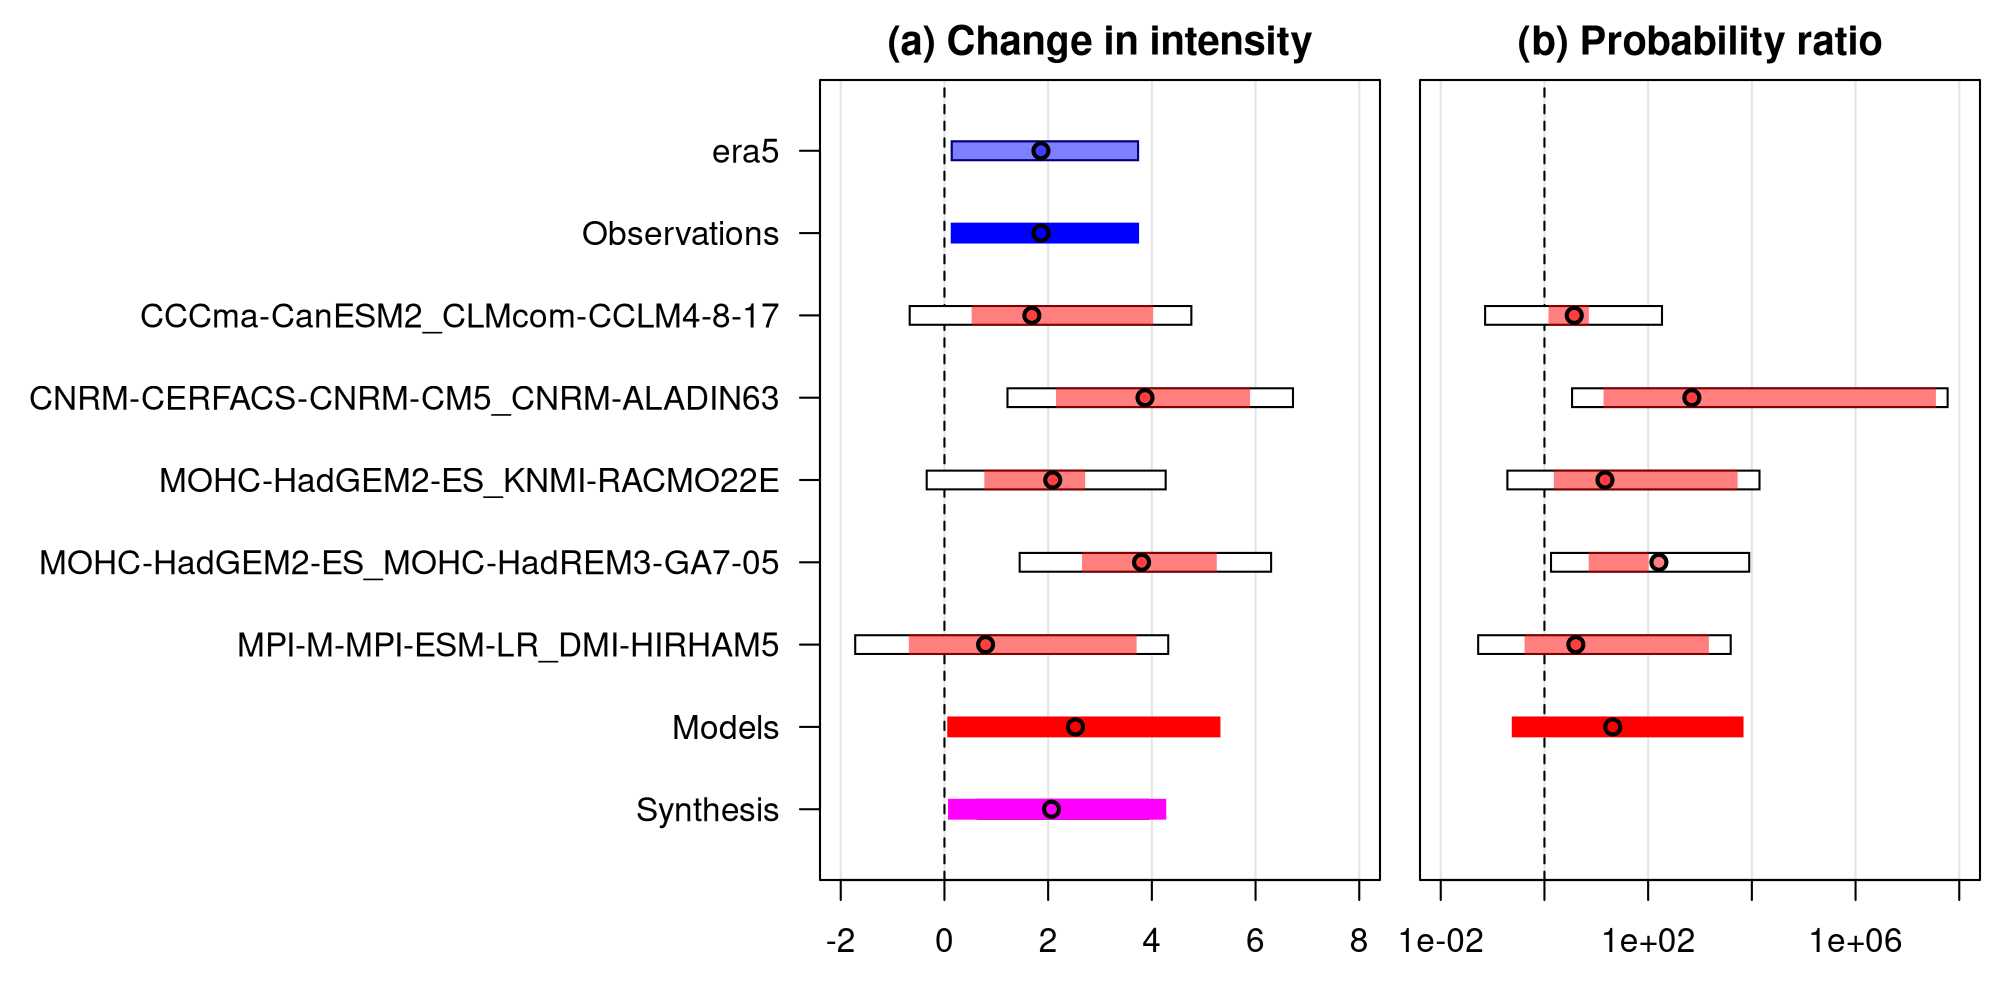

In [9]:
# put two figures next to each other
prep_window(c(1,2),
            h = 5,                    # height of the figure (ins)
            w = 5,                    # width of each panel (ins)
            oma = c(0,20,0,0),        # increase second number until model names fit in margin
            mar = c(3,0.5,2,0.5))     # shouldn't need to be changed

# set the x-axis (xlim) so that both the past & future changes use the same scaling
plot_synthesis(synth_dI_attr, add_space = F, main = "(a) Change in intensity", xlim = c(-2,8))
plot_synthesis(synth_PR_attr, add_space = F, hide_labels = T, main = "(b) Probability ratio", xlim = c(1e-2, 1e8))

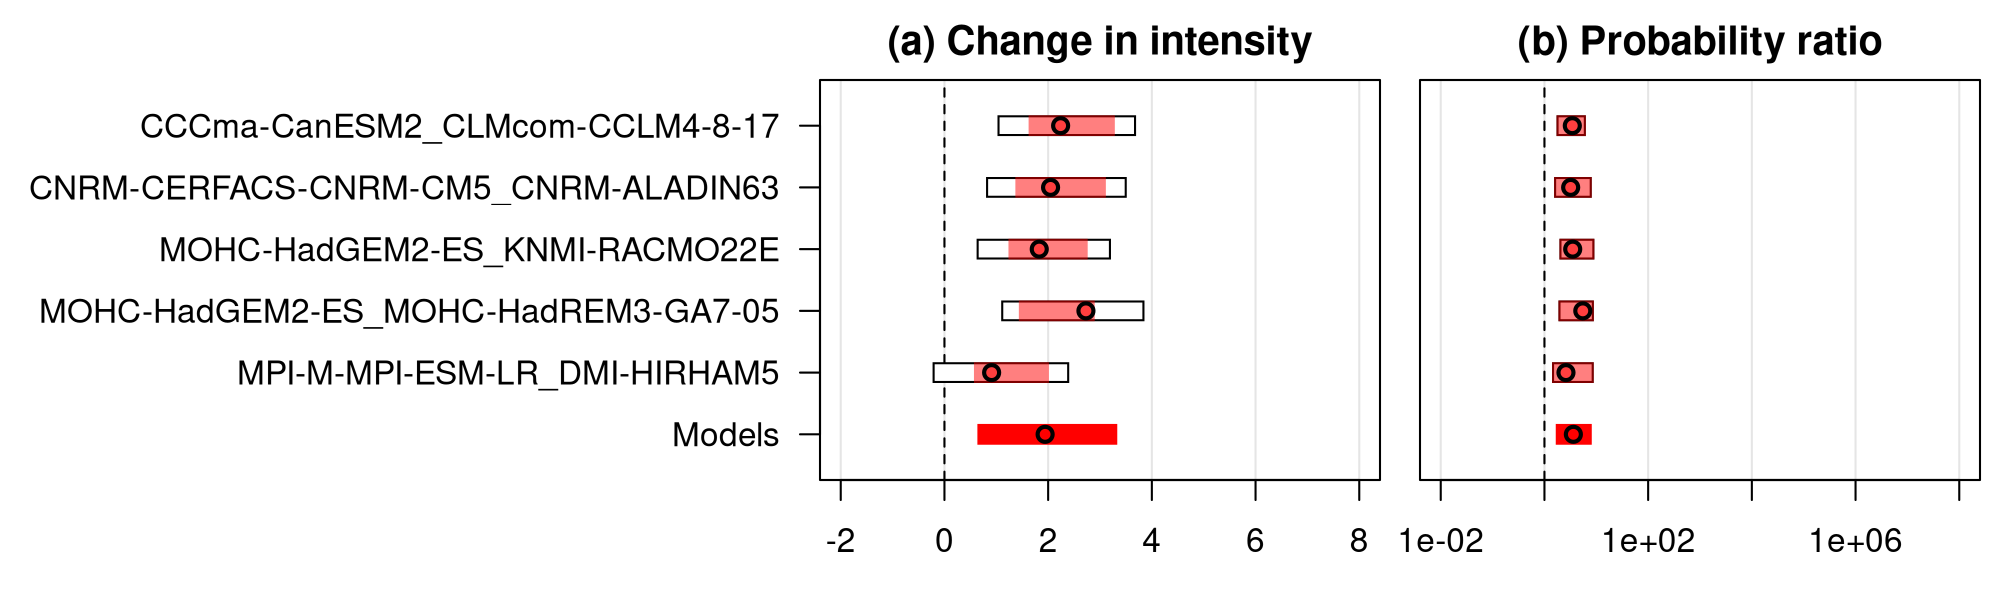

In [10]:
prep_window(c(1,2),
            h = 3,                    # height of the figure (ins)
            w = 5,                    # width of each panel (ins)
            oma = c(0,20,0,0),        # increase second number until model names fit in margin
            mar = c(3,0.5,2,0.5))     # shouldn't need to be changed

# set the x-axis (xlim) so that both the past & future changes use the same scaling
plot_synthesis(synth_dI_proj, add_space = F, main = "(a) Change in intensity", xlim = c(-2,8))
plot_synthesis(synth_PR_proj, add_space = F, hide_labels = T, main = "(b) Probability ratio", xlim = c(1e-2, 1e8))

## Produce figures of the synthesis

In [11]:
png("synth-fig_attr.png", height = 360, width = 480*1.5); par(mfrow = c(1,2), oma = c(0,20,0,0), mar = c(3,0.5,2,0.5)); {
    # set the x-axis (xlim) so that both the past & future changes use the same scaling
    plot_synthesis(synth_dI_attr, add_space = F, main = "(a) Change in intensity", xlim = c(-2,8))
    plot_synthesis(synth_PR_attr, add_space = F, hide_labels = T, main = "(b) Probability ratio", xlim = c(1e-2, 1e8))
}; dev.off()

pdf 
  2

In [12]:
png("synth-fig_proj.png", height = 240, width = 480*1.5); par(mfrow = c(1,2), oma = c(0,20,0,0), mar = c(3,0.5,2,0.5)); {
    # set the x-axis (xlim) so that both the past & future changes use the same scaling
    plot_synthesis(synth_dI_proj, add_space = F, main = "(a) Change in intensity", xlim = c(-2,8))
    plot_synthesis(synth_PR_proj, add_space = F, hide_labels = T, main = "(b) Probability ratio", xlim = c(1e-2, 1e8))
}; dev.off()

pdf 
  2